Counts for K-Means Clusters:
0    569
dtype: int64
Counts for K-Medoids Clusters:
0    569
dtype: int64


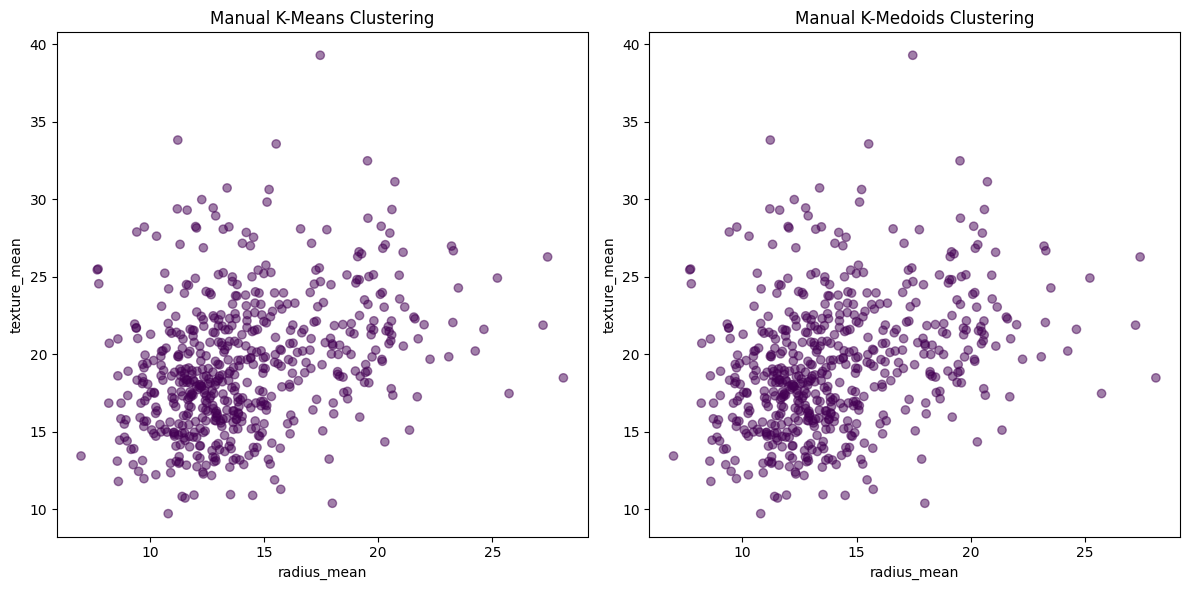

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the provided GitHub link
# Replace the 'URL' placeholder with the actual URL where your cancer.csv is located.
url = "https://github.com/pankajconnect99/ml/blob/main/cancer.csv"
data = pd.read_csv(url)

# Drop non-numeric columns and columns not needed for clustering
data_numeric = data.drop(columns=['id', 'diagnosis'])

# Handle missing values using mean imputation
data_imputed = data_numeric.fillna(data_numeric.mean())

# Standardize the data
data_scaled = (data_imputed - data_imputed.mean()) / data_imputed.std()

# Number of clusters
num_clusters = 2

# Manual K-Means clustering
def k_means(data, k, num_iterations=100):
    np.random.seed(0)
    centroids = data.sample(n=k, random_state=0).values
    for _ in range(num_iterations):
        distances = np.linalg.norm(data.values[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == i].mean().values for i in range(k)])
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids
    return labels

kmeans_labels = k_means(data_scaled, num_clusters)

# Manual K-Medoids clustering
def k_medoids(data, k, num_iterations=100):
    np.random.seed(0)
    medoids_indices = np.random.choice(data.shape[0], k, replace=False)
    for _ in range(num_iterations):
        distances = np.linalg.norm(data.values[:, np.newaxis] - data.values[medoids_indices], axis=2)
        labels = np.argmin(distances, axis=1)
        new_medoids_indices = [np.argmin(np.sum(distances[labels == i], axis=0)) for i in range(k)]
        if np.all(medoids_indices == new_medoids_indices):
            break
        medoids_indices = new_medoids_indices
    return labels

kmedoids_labels = k_medoids(data_scaled, num_clusters)

# Visualize the clusters and count the number of points in each cluster
plt.figure(figsize=(12, 6))

# Select "radius_mean" and "texture_mean" for plotting
X_plot = data[['radius_mean', 'texture_mean']].values

# Plot K-Means clusters
plt.subplot(1, 2, 1)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('Manual K-Means Clustering')
print("Counts for K-Means Clusters:")
print(pd.Series(kmeans_labels).value_counts())

# Plot K-Medoids clusters
plt.subplot(1, 2, 2)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=kmedoids_labels, cmap='viridis', alpha=0.5)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('Manual K-Medoids Clustering')
print("Counts for K-Medoids Clusters:")
print(pd.Series(kmedoids_labels).value_counts())

plt.tight_layout()
plt.show()
